# Homework 3: Exploratory Data Analysis

## Aliza Rafique (ar05986)

## Email: ar05986@st.habib.edu.pk

## Part 1

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [3]:
# Loading dataset
data = pd.read_csv('loan_small.csv')
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,B2,...,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,C5,...,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,C1,...,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79,B,B5,...,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1057818,1289186,7000,7000,7000.00000,36 months,8.90,222.28,A,A5,...,8000.34,7000.00,1000.34,0.00,0.00,0.00,Dec-14,229.64,Dec-14,INDIVIDUAL
995,1057629,1289394,2425,2425,2425.00000,36 months,15.27,84.39,C,C4,...,3052.79,2424.99,612.80,15.00,0.00,0.00,Jan-15,16.06,Jul-15,INDIVIDUAL
996,1057621,1289385,6950,6950,6950.00000,36 months,9.91,223.97,B,B1,...,7349.48,6950.01,399.47,0.00,0.00,0.00,Sep-12,1560.92,Apr-14,INDIVIDUAL
997,1057787,1289153,12375,12375,12344.46478,36 months,9.91,398.79,B,B1,...,13399.63,12375.01,1058.95,0.00,0.00,0.00,Dec-12,9056.48,Jan-16,INDIVIDUAL


### "Term"

In [4]:
# Excluding "months" text in the attribute 'term'.
data['term'] = data['term'].replace(' months', '', regex=True)
data['term'] = data['term'].astype('int')
data['term'].head(10)

0    36
1    60
2    36
3    36
4    60
5    36
6    60
7    36
8    60
9    60
Name: term, dtype: int32

### "Emp_length"

In [5]:
data['emp_length'] = data['emp_length'].str.extract('(\d+)', expand=False) ### 
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])
data['emp_length'] = data['emp_length'].astype('int')
data['emp_length'].head(10)

0    10
1     1
2    10
3    10
4     1
5     3
6     8
7     9
8     4
9     1
Name: emp_length, dtype: int32

### "Loan status"

In [6]:
# Converting the loan status to either paid or not paid (Paid or Unpaid)
data.loc[data['loan_status']!= 'Fully Paid', 'loan_status'] = 'Unpaid'
data.loc[data['loan_status']== 'Paid', 'loan_status'] = 'Paid'
data['loan_status'].unique()

array(['Fully Paid', 'Unpaid'], dtype=object)

### Months since last delinq and months since last record

In [7]:
# Filling in with missing values
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].mode()[0])
data['mths_since_last_record'] = data['mths_since_last_record'].fillna(round(data['mths_since_last_record'].mode(), 1))
data['mths_since_last_delinq'].head(10)
data[['mths_since_last_record', 'mths_since_last_delinq']].mode()

,mths_since_last_record,mths_since_last_delinq
0,83.0,38.0
1,91.0,NaN
2,113.0,NaN


## Part 2

In [8]:
data.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

The following data summary shows us the mean values of all the columns grouped by the loan amount and the funded amount. We can see that for the initial values of the loan and funded amount they are the same. We need to ignore the mean of IDs because that is a nominal data.

In [21]:
data['application_type'].describe()

count            999
unique             1
top       INDIVIDUAL
freq             999
Name: application_type, dtype: object

Here, we have created a new column "new" where we have the mean of the loan amount taken by the corresponding ID of the customer and for the term that they have taken loan for. 

In [23]:
data.groupby(['id','term'])['loan_amnt'].mean().nlargest(10).reset_index(name="new")

,id,term,new
0,1053763,60,35000.0
1,1053765,60,35000.0
2,1054438,36,35000.0
3,1055282,36,35000.0
4,1056057,60,35000.0
5,1056174,36,35000.0
6,1057239,60,35000.0
7,1057770,60,35000.0
8,1058824,60,35000.0
9,1058952,60,35000.0


The following describes the mean amount that has been funded grouped by the term in which it was funded.

In [24]:
data.groupby('term')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
term,,,,,,,,
36,725.0,10783.206897,6273.993577,1000.0,6250.0,10000.0,13500.0,35000.0
60,274.0,15940.784672,6746.637979,2500.0,11725.0,16000.0,20000.0,35000.0


### Univariate

#### Home Ownership
In the pie chart below, we can see the type of house owned by the people who took the survey. As we can see, more than half of the people have rented their homes and the least amount of people personally own their houses.

<AxesSubplot:ylabel='Number of People'>

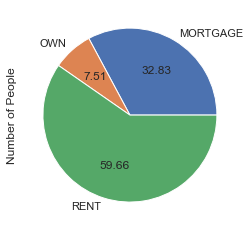

In [25]:
# Home ownership
data['home_ownership'].describe()
data.groupby('home_ownership').size().plot(kind='pie', ylabel='Number of People', autopct='%.2f')

#### Interest Rate
The following histogram represents a random distrbution of the interest rates. The pattern is slight of a normal distribution due to the peak at 12.5.

<AxesSubplot:ylabel='Frequency'>

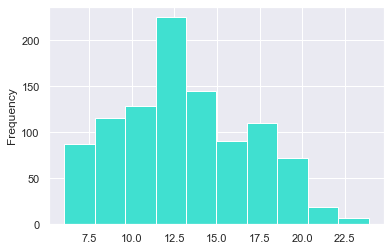

In [26]:
# data[''].describe()
data['int_rate'].plot(kind='hist', color='turquoise', xlabel="Interest Rates")
#data.groupby('int_rate').size().plot(kind='hist', color='turquoise', xlabel="Interest Rates")

#### Grade
The following bar graph represents the grade of the people employees involved in the survey. As the graph shows, most people belonged to the grade "B". 

<AxesSubplot:ylabel='grade'>

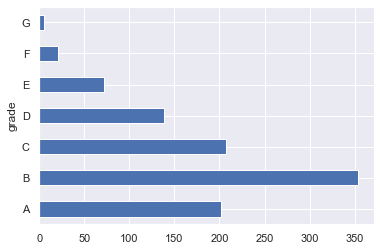

In [33]:
plot1 = data.groupby('grade').size().plot(kind='barh', ylabel='Number of People')
plot1

#### Sub-grade
The following bar graph represents the sub-grade of the people involved in the survey. This bar graph shows that most people belonged to the sub-grade "B3" and we can see many people belonging in sub-grades of B (in line with our output in previous part). After this bar graph, just to get an idea we have the pie chart of unique sub-grade categories.

<AxesSubplot:ylabel='sub_grade'>

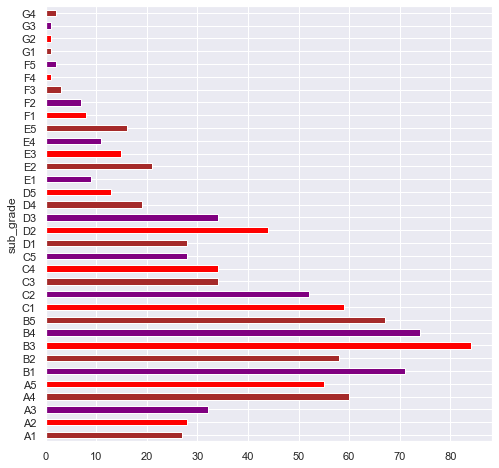

In [34]:
data.groupby('sub_grade').size().plot(kind='barh', ylabel='Number of People', color=['brown', 'red', 'purple'], figsize=((8, 8)))

### Bivariate

In [35]:
data.keys()

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

#### Funded Amount VS Funded Amount Invested (Continuous VS Continuous)
The aim is to determine the relationship between the columns above. The scatter plot below, it shows a clear string directly proportional relationship between funded_amnt and funded_amnt_inv. We can also see some outliers.

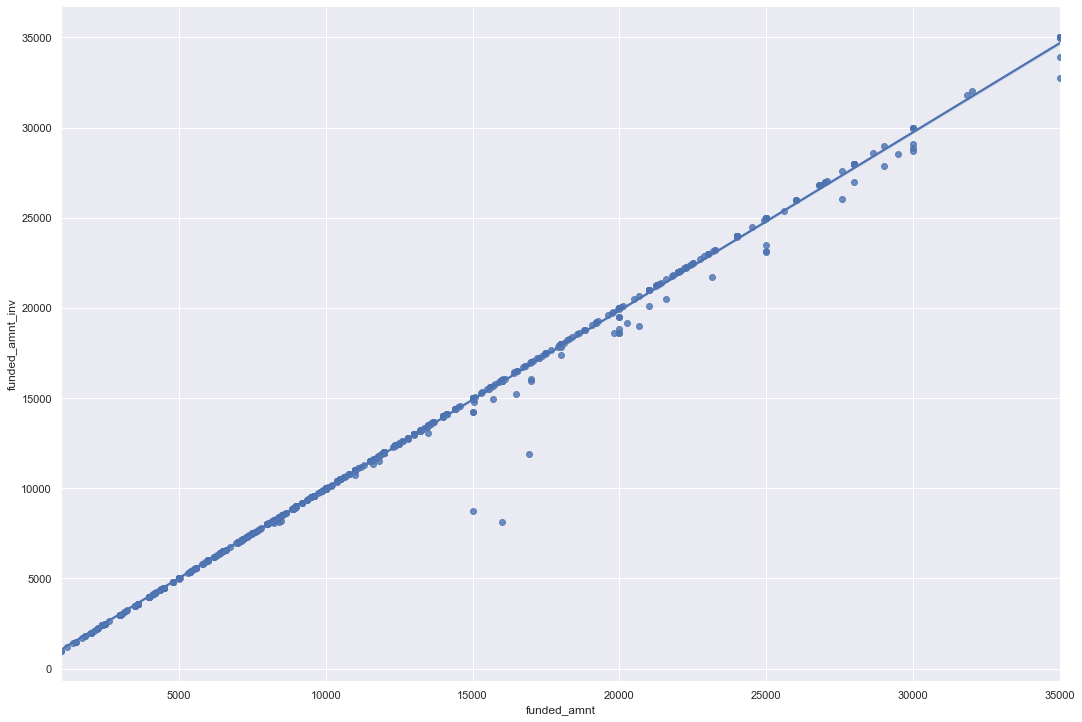

In [36]:
# data.plot.scatter(x='funded_amnt', y='funded_amnt_inv', figsize=((8, 8)), color='green')
sns.lmplot(x='funded_amnt',y='funded_amnt_inv',data=data,fit_reg=True, palette='Set1', height=10, aspect=1.5) 

#### Sub grade VS Loan Amount (Continuous VS Discrete)
This graph shows that people with subgrades F1, E5, G4, E2, G3, G2 have taken higher loan amounts than others. 

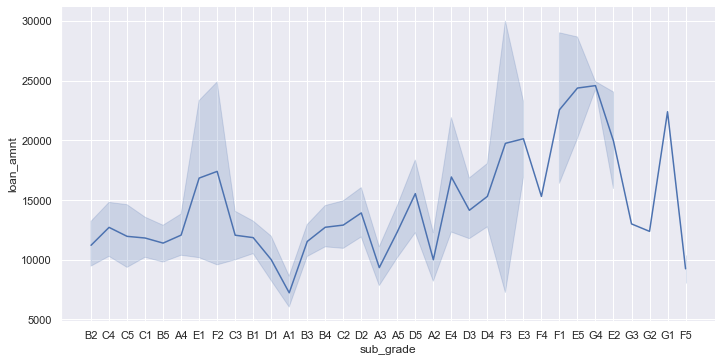

In [37]:
sns.relplot(
    data=data, 
    x="sub_grade", y="loan_amnt", 
    kind="line", aspect=2.0
)

#### Correlation Plot
In this correlation plot, we can see some strong correlation (both positive and negative). For example, total payment with loan amount, total payment with total_rec_int and so on. Some correlations that appear to be strong but can be ignored for example, ID with member_id as the nature of these elements is different. These correlations can mean different things based on the context.

<AxesSubplot:>

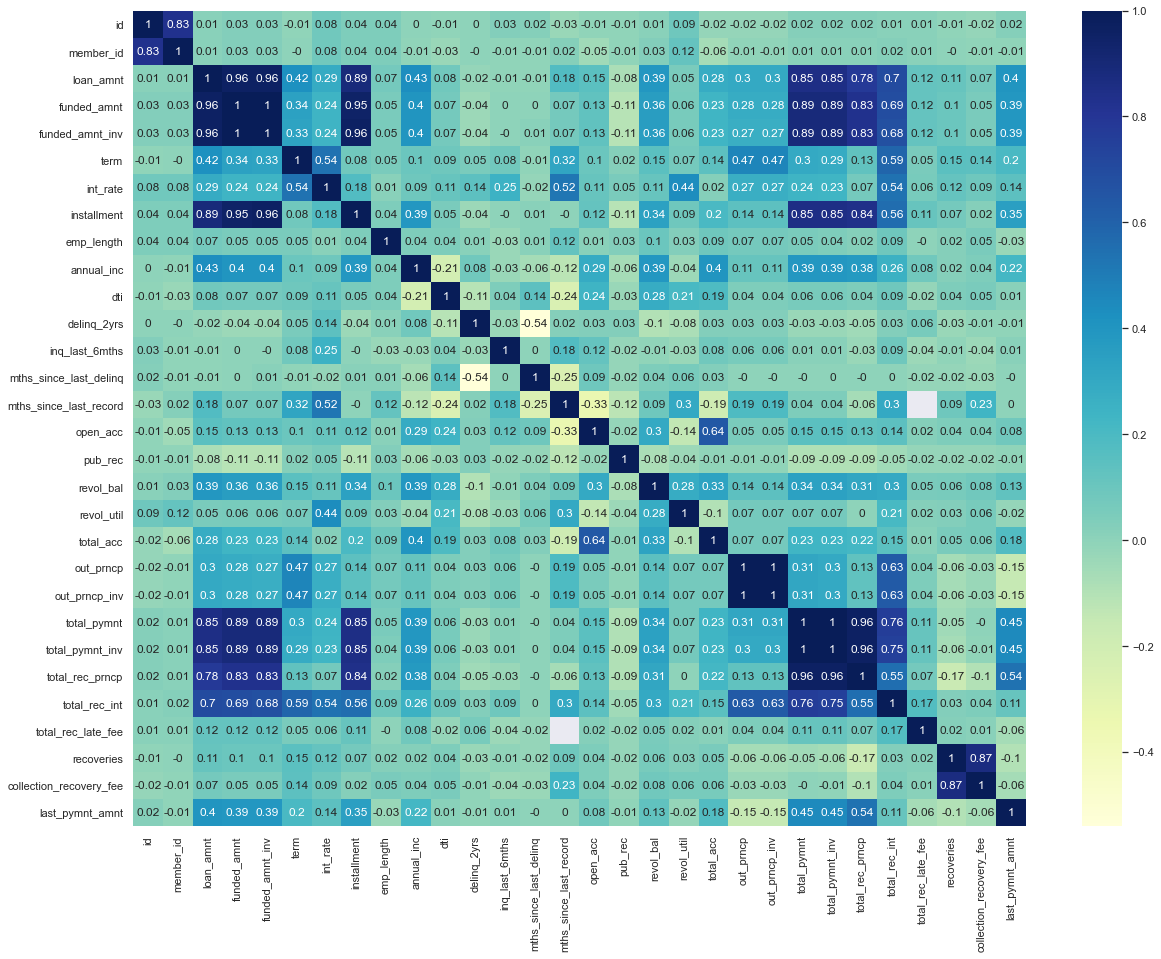

In [38]:
plt.figure(figsize=(20, 15))
sns.heatmap(round(data.corr(),2), cmap='YlGnBu',annot=True)

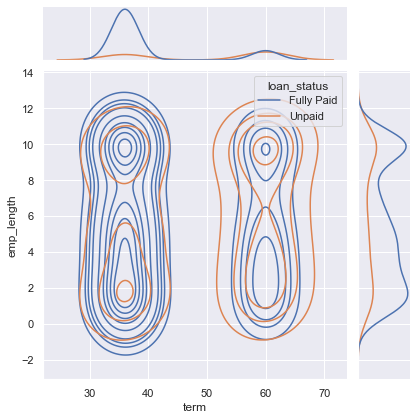

In [46]:
sns.jointplot(
    data=data,
    x="term", y="emp_length", hue="loan_status",
    kind="kde"
)

### Multivariate
In these plots, we can see that for the loan status fully paid most people paid it by the term 10. 

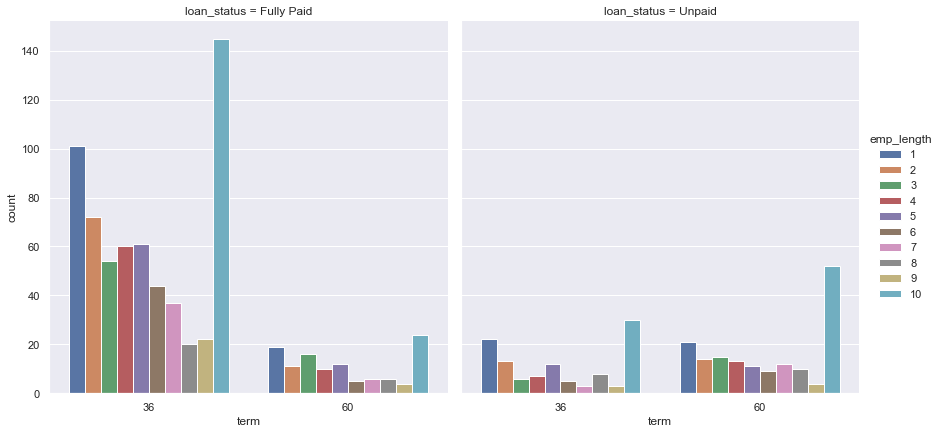

In [44]:
sns.catplot(x="term", hue="emp_length", col="loan_status",
                data=data, kind="count",
                height=6, aspect=1)

# End of Assignment